# EE 5020 Homework 2: Visualizing distributions and basic regression modeling, Round 2

In this homework, you'll practice programming with the scientific Python stack (NumPy, SciPy, pandas, statsmodels, matplotlib, seaborn) and getting what you already know (or are re-learning) about statistics down in a structured manner.

You can add as many cells as you need by using the "plus" icon above.

## Section 1: Analyzing Solar Energy (PV) Energy generation

In this section, you'll practice analyzing a real-world dataset and attempt to draw some statistical conclusions (inference and regression modeling) from this data.  This section will walk you through the steps of data exploration and visualization, data cleanup (if needed), preliminary modeling, and finally inference.

**Dataset:** `datasets_real/Sao_Paolo_PV_generation.xlsx` (Dataset creators: Enerq-USP / Southeast of Brazil)

**Dataset description:** See the first sheet ("Info") for the description.

**Our overarching research problem:** Can we build a regression model to predict the Power in Watts (column I in sheet "Trend")?

**Problem 1:** Import the data and perform some initial data analysis and visualization.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrices
import statsmodels.api as sm

%matplotlib inline

In [2]:
df_sppv = pd.read_excel(
    "../datasets_real/Sao_Paolo_PV_generation.xlsx",
    sheet_name="Trend", 
    skiprows=[1]
)

In [3]:
df_sppv.head()

,Date,Hour,Current DC In,Current of grid phase L1,State,Frequency of grid,Radiation,Grid connection number,Power,Powre DC In,Total energy,Insulation resistance,External temperature,Module temperature,Voltage DC In,Voltage of grid phase L1,Run time,Grid connection time,Wind speed
0,01.12.2013,00:00:00,0.0,0.0,Ok,0.0,0.0,173,0,0,902.29,0,21.2,20.0,0.0,0.0,1319.62,1247.55,0.04
1,01.12.2013,00:05:00,0.0,0.0,Ok,0.0,0.0,173,0,0,902.29,0,21.1,20.0,0.0,0.0,1319.62,1247.55,0.15
2,01.12.2013,00:10:00,0.0,0.0,Ok,0.0,0.0,173,0,0,902.29,0,21.2,20.1,0.0,0.0,1319.62,1247.55,0.00
3,01.12.2013,00:15:00,0.0,0.0,Ok,0.0,0.0,173,0,0,902.29,0,21.1,20.1,0.0,0.0,1319.62,1247.55,0.00
4,01.12.2013,00:20:00,0.0,0.0,Ok,0.0,0.0,173,0,0,902.29,0,21.1,20.1,0.0,0.0,1319.62,1247.55,0.00


In [4]:
def replace_spaces_with_underscores(in_str: str) -> str:
    """
    :param in_str: some input string maybe with some spaces
    :return: in_str without spaces (all spaces replaced with underscores)
    """
    return in_str.replace(" ", "_")

In [5]:
df_sppv.drop(columns="State", inplace=True)

In [6]:
# using a separate function
df_sppv.rename(
    mapper=replace_spaces_with_underscores,
    axis='columns',
    inplace=True
)

In [ ]:
# using a separate function
df_sppv.rename(
    mapper=lambda in_str: in_str.replace(" ", "_"),
    axis='columns',
    inplace=True
)

In [7]:
df_sppv.describe()

,Current_DC_In,Current_of_grid_phase_L1,Frequency_of_grid,Radiation,Grid_connection_number,Power,Powre_DC_In,Total_energy,Insulation_resistance,External_temperature,Module_temperature,Voltage_DC_In,Voltage_of_grid_phase_L1,Run_time,Grid_connection_time,Wind_speed
count,2721.000000,2721.000000,2721.000000,2720.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000,2720.000000,2720.000000,2721.000000,2721.000000,2721.000000,2721.000000,2721.000000
mean,1.871036,2.105542,32.654259,258.028676,178.688717,470.555678,504.979787,956.224517,1632.855568,25.987059,30.273382,150.577607,121.871279,1380.152874,1306.285344,0.336891
std,2.621299,2.947060,29.884982,373.496053,3.074166,659.265110,699.186019,33.218334,1494.379508,5.802319,14.071063,138.769270,111.474330,35.139784,34.089086,0.424169
min,0.000000,0.000000,0.000000,0.000000,173.000000,0.000000,0.000000,902.290000,0.000000,16.700000,14.100000,0.000000,0.000000,1319.570000,1247.550000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,177.000000,0.000000,0.000000,921.930000,0.000000,21.300000,19.600000,0.000000,0.000000,1347.960000,1274.890000,0.000000
50%,0.190000,0.120000,59.980000,19.000000,179.000000,26.000000,41.000000,959.950000,3000.000000,23.600000,22.800000,247.930000,219.320000,1383.320000,1309.280000,0.150000
75%,3.600000,4.020000,60.000000,464.000000,181.000000,894.000000,962.000000,984.900000,3000.000000,30.900000,41.425000,280.570000,224.390000,1409.700000,1335.070000,0.560000
max,9.030000,9.260000,60.050000,1366.000000,184.000000,2059.000000,2187.000000,1009.330000,3000.000000,41.400000,71.500000,334.990000,230.890000,1440.180000,1363.530000,2.810000


In [13]:
df_sppv_y, df_sppv_X = dmatrices(
    "Power ~ Radiation + External_temperature + Module_temperature", 
    data=df_sppv,
    return_type="dataframe"
)

df_sppv_new = pd.concat([df_sppv_y, df_sppv_X], axis=1)
df_sppv_new.head()

,Power,Intercept,Radiation,External_temperature,Module_temperature
0,0.0,1.0,0.0,21.2,20.0
1,0.0,1.0,0.0,21.1,20.0
2,0.0,1.0,0.0,21.2,20.1
3,0.0,1.0,0.0,21.1,20.1
4,0.0,1.0,0.0,21.1,20.1


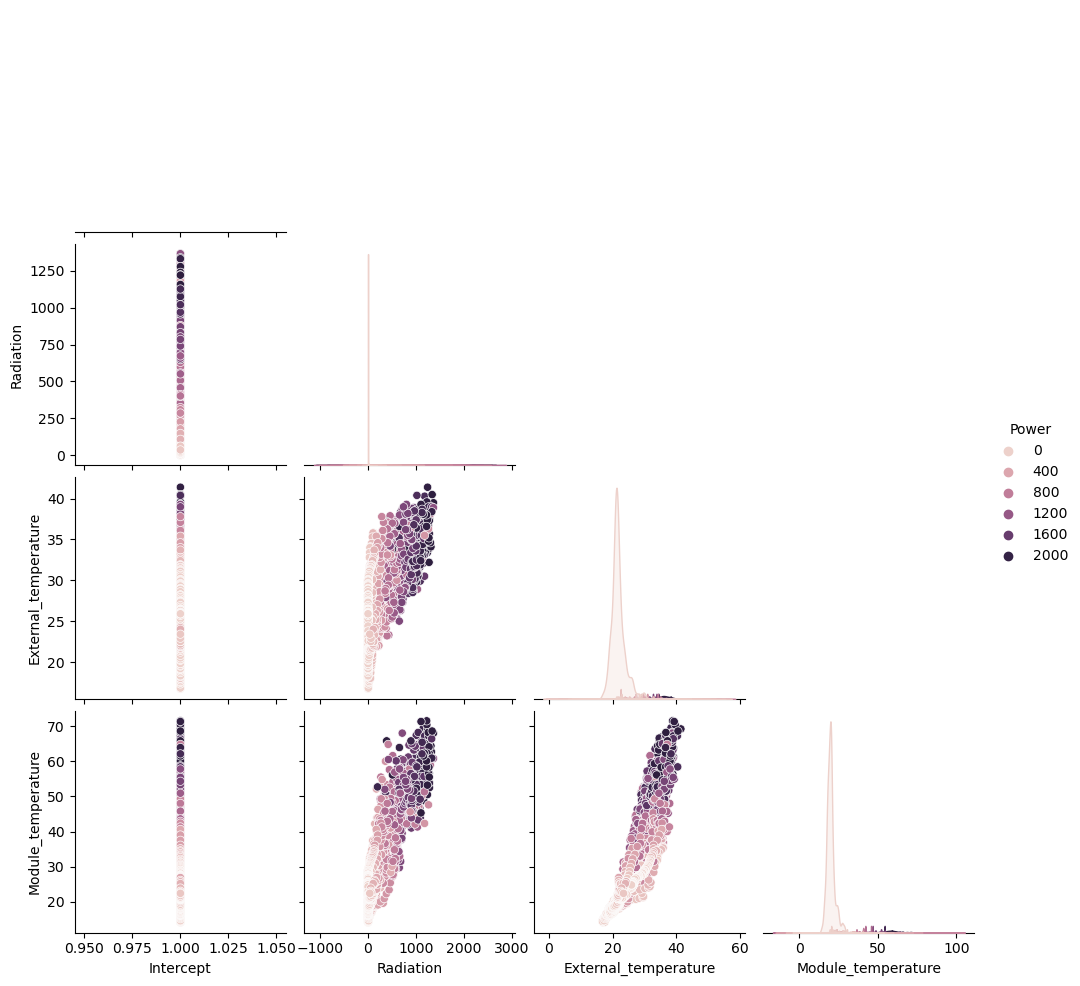

In [15]:
sns.pairplot(df_sppv_new, hue="Power", corner=True)

**Problem 2:** Now, build a linear regression model to estimate the heating load (do not use the cooling load as a feature).  How well does your model work?  How do you know?

In [16]:
sppv_ols = sm.OLS(endog=df_sppv_y, exog=df_sppv_X)

In [17]:
sppv_ols_results = sppv_ols.fit()

In [18]:
sppv_ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Power   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                 1.907e+04
Date:                Mon, 03 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:28:06   Log-Likelihood:                -17308.
No. Observations:                2720   AIC:                         3.462e+04
Df Residuals:                    2716   BIC:                         3.465e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -68.9192     20.233     -3.406      0.001    -108.594     -29.245
Radiation                1.1873      0.020     58.685      0.000       1.148       1.227
External_temperature   -14.9541      1.328    -11.260      0.000     -17.558     -12.350
Module_temperature      20.5405      0.820     25.060      0.000      18.933      22.148
==============================================================================
Omnibus:                     1096.542   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44671.190
Skew:                          -1.200   Prob(JB):                         0.00
Kurtosis:                      22.708   Cond. No.                     3.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

eval_env: 1


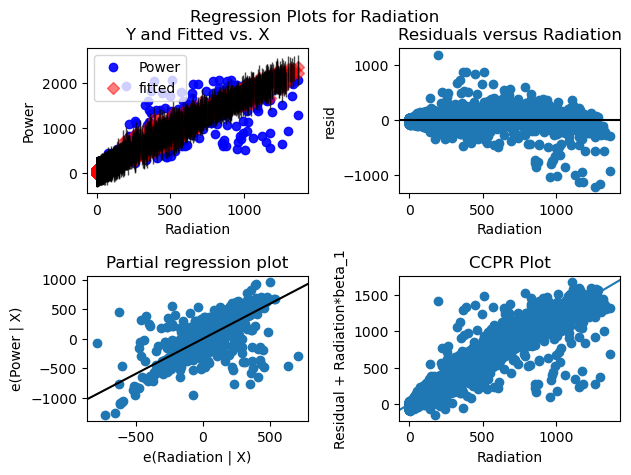

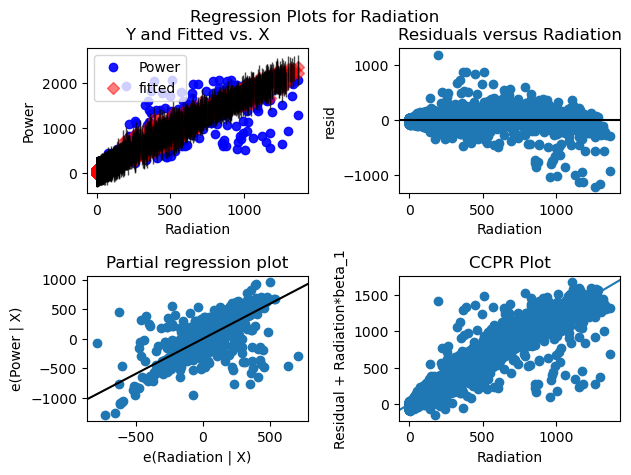

In [19]:
sm.graphics.plot_regress_exog(sppv_ols_results, "Radiation")

In [20]:
from sklearn.linear_model import RANSACRegressor

In [22]:
sppv_ransac = RANSACRegressor()
sppv_ransac_results = sppv_ransac.fit(df_sppv_X, df_sppv_y)

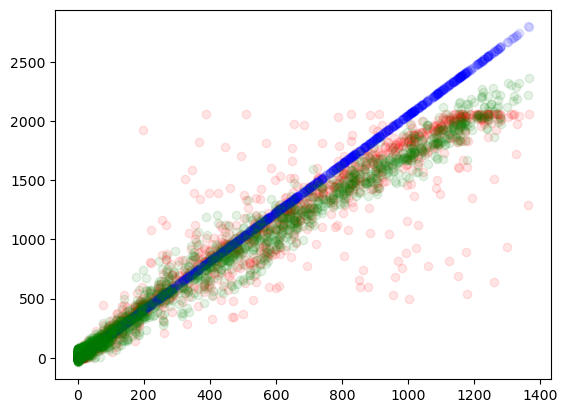

In [26]:
plt.scatter(df_sppv_X["Radiation"], df_sppv_y, c="red", alpha=0.1)
plt.scatter(df_sppv_X["Radiation"], sppv_ransac_results.predict(df_sppv_X), c="blue", alpha=0.1)
plt.scatter(df_sppv_X["Radiation"], sppv_ols_results.predict(df_sppv_X), c="green", alpha=0.1)

**Problem 3:** Let's say that we wanted to just build the "best" possible regression (basically, lowest mean square error) that includes nonlinear regression methods.  Which method works the best for this dataset?